---
### 국제선 지역별 통계 
- data source : https://kosis.kr/statHtml/statHtml.do?orgId=381&tblId=DT_920005_B005&conn_path=I2
- 지역별 운항편수, 월별 운항편수, 도축/출발 운항편수 비교
- 데이터 준비
> 1. 국가통계포털(kosis)의 교통.물류 -> 항공통계 -> 국제선 지역별 통계 페이지 접속 
> 2. 지역/시점/도착출발별 x 항목 형태로 행렬전환 
> 3. 조회 설정에서 각 항목의 합계는 제외하고, 전체기간 데이터를 csv로 다운로드 
---

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df_region = pd.read_csv('data/kosis_airline_region.csv', encoding='cp949')
print(df_region.shape)
df_region.head(2)

(3806, 6)


,지역별(1),시점,도착출발별(1),운항 (편),여객 (명),화물 (톤)
0,일본,2005.01,도착,1733,351340,16217
1,일본,2005.01,출발,1736,379355,17319


In [3]:
df_region.columns = ['지역', '시점', '도착출발', '운항_편', '여객_명', '화물_톤']
df_region.tail(2)

,지역,시점,도착출발,운항_편,여객_명,화물_톤
3804,기타,2023.05,도착,0,0,0
3805,기타,2023.05,출발,1,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3806 entries, 0 to 3805
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      3806 non-null   object 
 1   시점      3806 non-null   float64
 2   도착출발    3806 non-null   object 
 3   운항_편    3806 non-null   int64  
 4   여객_명    3806 non-null   int64  
 5   화물_톤    3806 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 178.5+ KB
None


<AxesSubplot:>

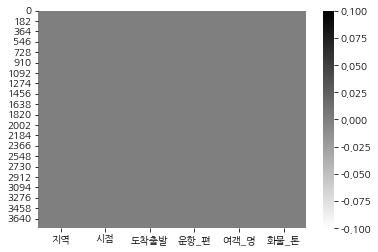

In [4]:
print( df_region.info() )
sns.heatmap(df_region.isnull(), cmap='gray_r')

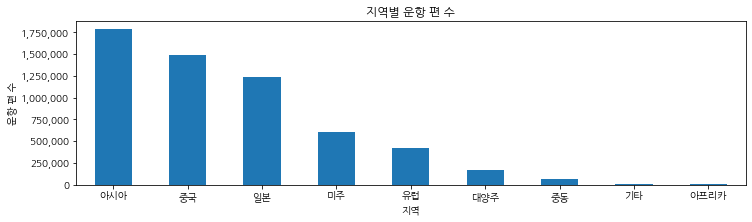

In [5]:
## 지역별 운항편수 
region_flight_counts = df_region.groupby("지역")["운항_편"].sum().sort_values(ascending=False)
region_flight_counts.plot(kind="bar", figsize=(12, 3), rot=0)
plt.title("지역별 운항 편 수")
plt.xlabel("지역")
plt.ylabel("운항 편 수")
## y축 값 표시형식 지정 
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

In [6]:
## 월별 운항편수 
## 시점 변수의 타입이 float --> datetime으로 변환 필요
df_region["시점"] = pd.to_datetime(df_region["시점"].astype(str), format="%Y.%m")
df_region["연도"] = df_region["시점"].dt.year
df_region["월"] = df_region["시점"].dt.month
df_region.head()

,지역,시점,도착출발,운항_편,여객_명,화물_톤,연도,월
0,일본,2005-01-01,도착,1733,351340,16217,2005,1
1,일본,2005-01-01,출발,1736,379355,17319,2005,1
2,일본,2005-02-01,도착,1662,361438,16566,2005,2
3,일본,2005-02-01,출발,1655,343217,16572,2005,2
4,일본,2005-03-01,도착,1852,386047,18001,2005,3


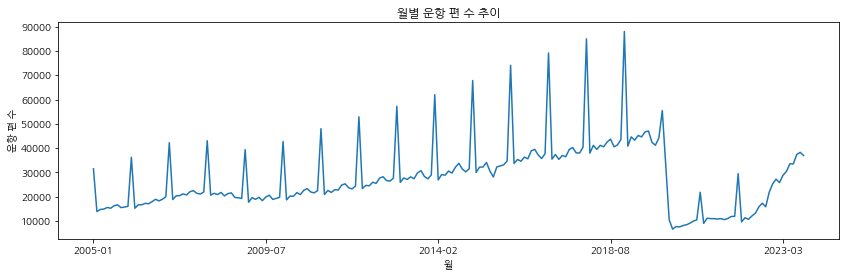

In [7]:
plt.figure(figsize=(14,4))
monthly_flight_counts = df_region.groupby(df_region["시점"].dt.strftime("%Y-%m"))["운항_편"].sum()
monthly_flight_counts.plot(kind="line")
plt.title("월별 운항 편 수 추이")
plt.xlabel("월")
plt.ylabel("운항 편 수")
plt.show()

- 매년 1월달이 성수기 

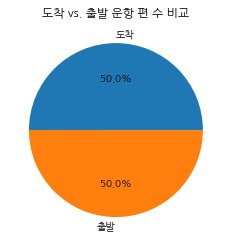

In [8]:
## 도착 / 출발 운항편 비교 
arrival_vs_departure = df_region.groupby("도착출발")["운항_편"].sum()
arrival_vs_departure.plot(kind="pie", autopct='%1.1f%%')
plt.title("도착 vs. 출발 운항 편 수 비교")
plt.ylabel("")
plt.show()

In [9]:
df_region.groupby(["도착출발", df_region["시점"].dt.year])["운항_편"].sum().unstack().T

도착출발,도착,출발
시점,,
2005,93138,93269
2006,106786,106823
2007,126510,126527
2008,124840,124886
2009,116205,116281
2010,128304,128390
2011,140261,140310
2012,156860,156885
2013,169496,169493


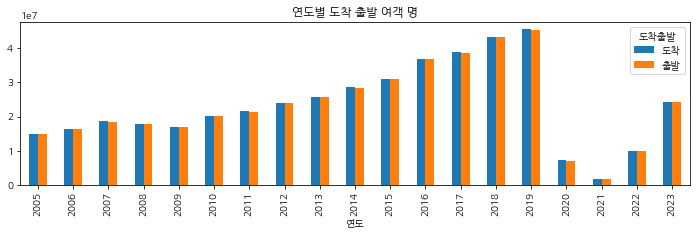

In [10]:
pd.crosstab(index=df_region["도착출발"],
            columns=df_region["연도"],
            values=df_region["여객_명"], aggfunc="sum"
            ).T.plot(kind="bar", figsize=(12, 3), title="연도별 도착 출발 여객 명");

- 항공수요는 꾸준히 증가하다가, 코로나 시기 급감하여 아직 원래수준에 회복하지 못하고 있음 
- 2019년 4천만명에 달했다가, 2022년은 1/4수준으로 급감 

In [11]:
## 연도 x 지역별 운항편수 
year_region = pd.crosstab(index=df_region["연도"], columns=df_region["지역"],
            values=df_region["운항_편"], aggfunc="sum").fillna(0)

year_region.style.background_gradient(cmap="Blues", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,239,"3,836","26,937","47,148",0,"14,498","44,682","47,043","2,024"
2006,98,"4,313","29,170","53,355",1,"15,556","48,452","60,190","2,474"
2007,390,"4,610","29,987","65,485",0,"18,541","49,162","82,592","2,270"
2008,394,"5,511","28,627","63,791",2,"19,942","50,915","78,073","2,471"
2009,316,"5,399","27,719","56,168",0,"18,038","54,115","68,161","2,570"
2010,552,"6,119","29,616","64,018",3,"19,389","59,570","74,639","2,788"
2011,553,"8,250","30,001","79,046",4,"21,233","60,748","77,363","3,373"
2012,571,"9,631","29,845","92,740",173,"22,418","69,939","84,985","3,443"
2013,558,"10,718","30,551","101,289",540,"23,498","72,895","95,264","3,676"


In [12]:
## 연도 x 지역별 여행객수 
year_region = pd.crosstab(index=df_region["연도"], columns=df_region["지역"],
            values=df_region["여객_명"], aggfunc="sum").fillna(0)

year_region.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,"20,744","921,328","3,031,358","8,459,487",0,"1,905,156","8,628,365","6,592,300","256,738"
2006,"3,479","963,031","3,144,959","9,789,110",0,"2,053,488","9,174,579","7,342,405","376,978"
2007,"12,622","1,021,044","3,368,217","10,926,890",0,"2,375,743","9,621,864","9,384,914","324,067"
2008,"6,050","1,167,561","3,300,343","10,674,781",0,"2,571,712","9,513,066","7,932,666","356,420"
2009,382,"1,130,061","3,369,417","9,390,751",0,"2,360,253","9,973,180","7,079,824","378,319"
2010,845,"1,294,206","3,700,286","11,653,773",0,"2,588,514","11,238,163","9,192,973","596,363"
2011,7,"1,492,327","3,895,005","13,785,928",212,"2,861,057","10,419,380","9,769,438","648,084"
2012,48,"1,748,255","4,014,662","15,877,264","15,537","3,190,470","11,566,437","10,832,322","715,296"
2013,0,"1,871,132","4,146,479","17,389,315","35,005","3,410,959","11,000,917","12,634,743","801,421"


- 아시아와 일본, 중국 노선의 운항편과 승객수가 가장 많다. 
- 피크였던 2019년의 경우 일본노선의 편수는 118천회, 승객수는 1890만명에 달했다. 

<AxesSubplot:xlabel='연도'>

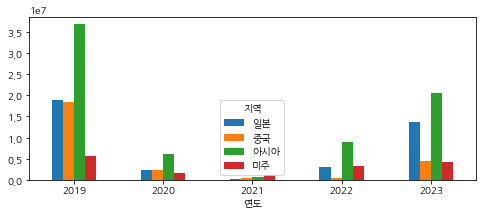

In [13]:
## iloc[-5:] : 데이터 프레임 마지막 5개만 가져와라 
year_region.iloc[-5:][["일본", "중국", "아시아", "미주"]].plot(kind="bar", figsize=(8,3), rot=0)

<AxesSubplot:xlabel='지역'>

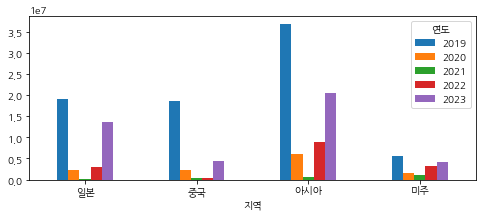

In [14]:
## T 옵션
year_region.iloc[-5:][["일본", "중국", "아시아", "미주"]].T.plot(kind="bar", figsize=(8,3), rot=0)

<AxesSubplot:xlabel='연도'>

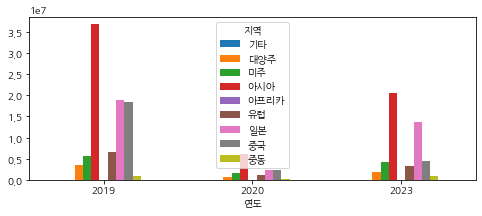

In [15]:
## loc[[2019, 2020, 2023]] : index에서 해당값의 데이터들만 가져와라 
year_region.loc[[2019, 2020, 2023]].plot(kind="bar", figsize=(8,3), rot=0)

<AxesSubplot:xlabel='지역'>

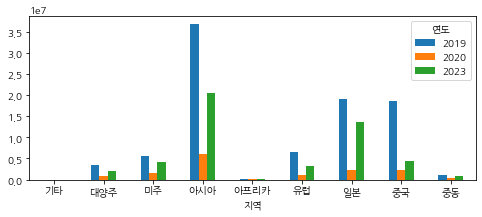

In [16]:
## 코로나 이전 수준으로 회복되었는가? 
## T 옵션 사용
year_region.loc[[2019, 2020, 2023]].T.plot(kind="bar", figsize=(8,3), rot=0)

- 2023년 데이터는 1~9월까지만 존재. 정확한 비교를 위해 월단위 비교가 필요 

In [20]:
df_month = df_region[df_region["월"] == 9]
year_region_m = pd.crosstab(index=df_month["연도"], 
                            columns=df_month["지역"],
                            values=df_month["운항_편"], 
                            aggfunc="sum").fillna(0)

year_region_m.style.background_gradient(cmap="Oranges", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,26,273,"2,166","3,792",0,"1,239","3,823","4,021",200
2006,18,303,"2,580","4,188",0,"1,363","4,015","5,634",207
2007,28,351,"2,583","5,465",0,"1,683","4,128","6,987",175
2008,41,360,"2,387","4,725",0,"1,697","4,186","6,118",196
2009,26,416,"2,292","4,271",0,"1,499","4,519","5,680",212
2010,48,487,"2,513","5,315",0,"1,705","5,107","6,583",229
2011,52,707,"2,581","6,351",0,"1,831","5,064","6,867",292
2012,48,840,"2,581","7,523",26,"1,913","5,962","7,536",268
2013,52,825,"2,530","7,952",62,"2,015","6,185","8,438",295


In [21]:
df_month = df_region[df_region["월"] == 9]
year_region_m = pd.crosstab(index=df_month["연도"], 
                            columns=df_month["지역"],
                            values=df_month["화물_톤"], 
                            aggfunc="sum").fillna(0)

year_region_m.style.background_gradient(cmap="Greys", axis=None).format("{:,.0f}")

지역,기타,대양주,미주,아시아,아프리카,유럽,일본,중국,중동
연도,,,,,,,,,
2005,24,"2,919","53,136","57,556",0,"33,711","38,222","30,729","2,319"
2006,69,"3,413","61,218","66,408",0,"40,504","38,264","40,450","2,388"
2007,21,"3,524","60,183","70,337",0,"45,675","38,227","47,812","2,554"
2008,13,"3,616","53,344","63,539",0,"41,326","33,020","44,553","2,218"
2009,0,"3,969","53,852","63,124",0,"41,101","36,271","52,310","2,304"
2010,0,"3,753","57,915","67,223",0,"44,777","39,293","51,418","2,885"
2011,0,"4,657","54,172","66,967",0,"45,365","35,578","51,569","3,710"
2012,0,"4,468","55,307","74,677",190,"44,839","36,244","51,610","4,708"
2013,0,"4,054","52,236","73,888",201,"43,230","34,833","53,705","5,033"


- 9월달 기준으로, '23년 항공수요는 코로나 이전인 '21년 수준에 거의 근접하고 있다. 

In [25]:
ym = pd.crosstab(df_region["연도"], df_region["월"], 
                 values=df_region["여객_명"], 
                 aggfunc="sum")

ym.style.background_gradient(cmap="Greens", axis=None).format("{:,.0f}")

월,1,2,3,4,5,6,7,8,9,11,12
연도,,,,,,,,,,,
2005,"5,114,876","2,288,820","2,299,773","2,328,959","2,365,823","2,473,956","2,740,435","3,022,313","2,379,021","2,385,822","2,415,678"
2006,"5,544,001","2,549,673","2,492,223","2,530,907","2,625,165","2,628,982","2,908,073","3,244,183","2,686,897","2,806,500","2,831,425"
2007,"6,288,355","2,850,772","2,971,853","2,864,007","3,006,044","2,989,737","3,346,495","3,618,076","2,970,149","3,056,207","3,073,666"
2008,"6,315,869","3,175,760","2,989,312","2,938,348","3,084,518","2,911,683","3,118,589","3,301,687","2,582,040","2,517,793","2,587,000"
2009,"5,650,868","2,725,041","2,698,756","2,724,696","2,581,066","2,447,316","3,074,060","3,401,219","2,658,910","2,717,942","3,002,313"
2010,"6,878,921","3,067,126","3,284,387","3,155,342","3,270,964","3,201,611","3,584,625","3,912,356","3,321,311","3,330,299","3,258,181"
2011,"7,493,721","3,325,666","3,207,187","3,091,762","3,338,794","3,452,129","3,963,720","4,255,215","3,577,082","3,523,136","3,643,026"
2012,"8,061,868","3,766,647","3,718,727","3,789,394","3,835,926","3,925,031","4,367,841","4,748,209","3,908,356","3,841,147","3,997,145"
2013,"8,718,395","4,045,269","4,186,603","3,895,433","3,899,971","4,166,124","4,661,545","5,155,519","4,300,851","4,019,963","4,240,298"


In [26]:
ym = pd.crosstab(df_region["연도"], df_region["월"], 
                 values=df_region["화물_톤"], 
                 aggfunc="sum")

ym.style.background_gradient(cmap="Greens", axis=None).format("{:,.0f}")

월,1,2,3,4,5,6,7,8,9,11,12
연도,,,,,,,,,,,
2005,"439,982","189,806","227,851","215,802","214,137","220,238","219,941","212,933","218,616","232,295","225,219"
2006,"470,011","205,318","246,962","233,290","223,858","229,386","236,369","244,577","252,714","258,788","252,278"
2007,"513,716","227,449","271,494","258,874","255,134","258,581","264,433","267,857","268,333","281,406","271,056"
2008,"511,285","243,158","276,045","262,169","258,842","257,950","258,377","256,772","241,629","227,481","203,698"
2009,"462,055","203,417","235,909","225,882","228,466","229,167","245,843","248,691","252,931","273,570","266,542"
2010,"551,027","247,353","295,056","279,669","292,222","275,569","285,809","273,384","267,264","279,004","280,567"
2011,"550,473","241,652","293,313","268,976","263,154","265,960","281,886","271,326","262,018","265,806","273,534"
2012,"521,836","258,279","279,442","259,729","261,544","268,138","273,022","271,056","272,043","275,475","268,222"
2013,"540,180","233,405","289,265","269,272","268,718","266,946","270,297","274,628","267,180","286,109","280,258"


- 역시 1월달이 승객과 화물 모두 최 성수기 
- 한편 코로나로 인한 승객 감소에 비해, 화물의 감소는 상대적으로 적었다. 